In [165]:
import os
print(os.getcwd())

d:\All Files\Documents\GitHub\yeeunPersonal\onlineCourseCode\udemyNeuralNetworks


In [166]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns

In [167]:
house = pd.read_csv(r'D:\All Files\Documents\GitHub\yeeunPersonal\onlineCourseCode\udemyNeuralNetworks\Files_linear_py\Files\Data\House_Price.csv', header = 0)

In [168]:
house.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [169]:
house.shape

(506, 19)

In [220]:
house.describe()

#observe that some of the data is skewed (both positively and negatively) and the outliers.

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,rainfall,parks,Lake,Lake and River,River
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,21.544466,12.653063,0.551383,7.899767,13.041605,39.181818,0.054454,0.191700,0.140316,0.361660
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.164946,7.141062,0.497845,1.476683,5.238957,12.513697,0.010632,0.394028,0.347659,0.480957
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,18.000000,1.730000,0.000000,5.268000,10.057600,3.000000,0.033292,0.000000,0.000000,0.000000
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,19.800000,6.950000,0.000000,6.634500,11.189800,28.000000,0.046464,0.000000,0.000000,0.000000
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,20.950000,11.360000,1.000000,7.999000,12.720000,39.000000,0.053507,0.000000,0.000000,0.000000
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,22.600000,16.955000,1.000000,9.088000,14.170800,50.000000,0.061397,0.000000,0.000000,1.000000
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,27.400000,37.970000,1.000000,10.876000,101.120000,60.000000,0.086711,1.000000,1.000000,1.000000


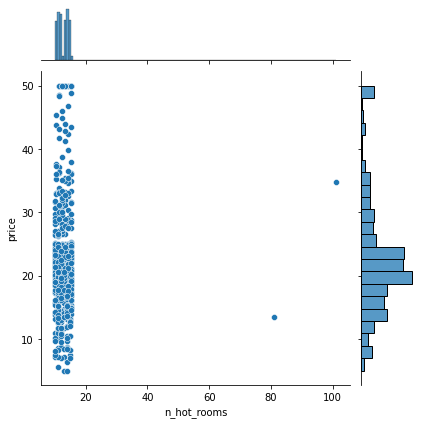

In [171]:
sns.jointplot(x = 'n_hot_rooms', y = 'price', data = house)

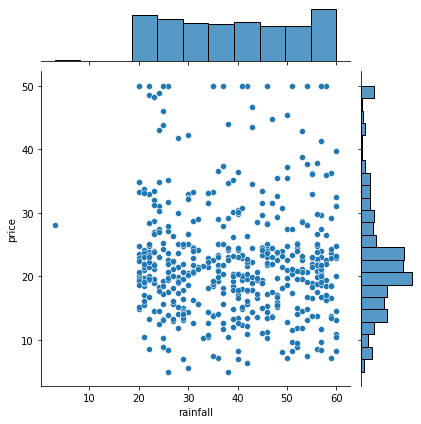

In [172]:
sns.jointplot(x = 'rainfall', y = 'price', data = house)

In [173]:
house.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


<AxesSubplot:xlabel='airport', ylabel='count'>

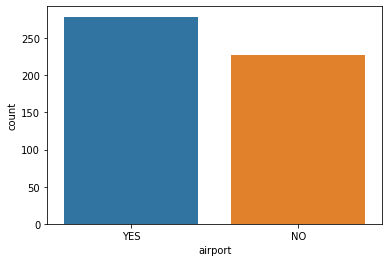

In [174]:
sns.countplot(x = 'airport', data = house)

<AxesSubplot:xlabel='waterbody', ylabel='count'>

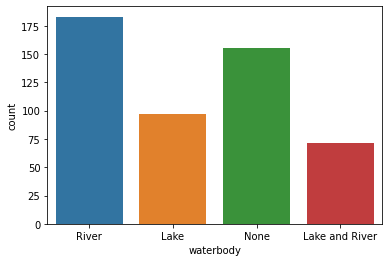

In [175]:
sns.countplot(x = 'waterbody', data = house)

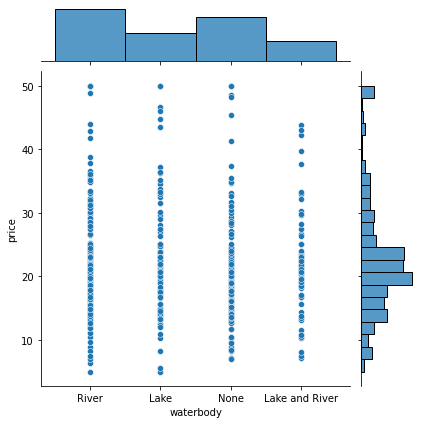

In [176]:
sns.jointplot(x = 'waterbody', y = 'price', data = house) #Interesting categrocial data

<AxesSubplot:xlabel='bus_ter', ylabel='count'>

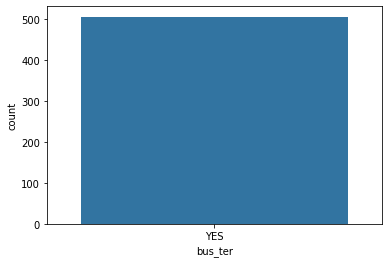

In [177]:
sns.countplot(x = 'bus_ter', data = house) #All yes so not really

Outlier Treatments

In [178]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [179]:
house.corr()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
price,1.000000,-0.389582,-0.484754,-0.429300,0.696304,-0.377999,0.251355,0.249459,0.246650,0.248200,0.505655,-0.740836,0.109646,0.023122,-0.047426,-0.391574
crime_rate,-0.389582,1.000000,0.406583,0.420972,-0.219247,0.352734,-0.380050,-0.379813,-0.380069,-0.376462,-0.289946,0.455621,0.017502,0.013518,0.059204,0.383235
resid_area,-0.484754,0.406583,1.000000,0.763651,-0.391676,0.644779,-0.706481,-0.707956,-0.707566,-0.705819,-0.383248,0.603800,0.005827,-0.000839,0.055810,0.707635
air_qual,-0.429300,0.420972,0.763651,1.000000,-0.302188,0.731470,-0.768589,-0.769724,-0.769157,-0.764873,-0.188933,0.590879,-0.049954,-0.004882,0.092104,0.915544
room_num,0.696304,-0.219247,-0.391676,-0.302188,1.000000,-0.240265,0.208464,0.203981,0.201907,0.205397,0.355501,-0.613808,0.032207,0.030674,-0.064694,-0.282817
age,-0.377999,0.352734,0.644779,0.731470,-0.240265,1.000000,-0.746904,-0.746493,-0.747021,-0.746707,-0.261515,0.602339,-0.021102,0.009380,0.075198,0.673850
dist1,0.251355,-0.380050,-0.706481,-0.768589,0.208464,-0.746904,1.000000,0.997905,0.997735,0.994073,0.232834,-0.498823,-0.030550,-0.014463,-0.036794,-0.706319
dist2,0.249459,-0.379813,-0.707956,-0.769724,0.203981,-0.746493,0.997905,1.000000,0.998097,0.994003,0.233707,-0.495693,-0.031248,-0.010239,-0.038005,-0.708237
dist3,0.246650,-0.380069,-0.707566,-0.769157,0.201907,-0.747021,0.997735,0.998097,1.000000,0.994126,0.233588,-0.494290,-0.028471,-0.010077,-0.041470,-0.709346
dist4,0.248200,-0.376462,-0.705819,-0.764873,0.205397,-0.746707,0.994073,0.994003,0.994126,1.000000,0.228256,-0.496084,-0.021648,-0.005850,-0.032542,-0.703508


In [180]:
#parks and air_qual has a very high correlation with each other.
#As a result multicolinearity is generated resulting in a bias in the model
#Typically choose the variable with higher correlation with the dependent variable and delete the next

house.drop(['parks'], axis=1)

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,NO,9.348,12.1792,Lake and River,27,YES
502,20.6,0.04527,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,YES,6.612,13.1648,Lake and River,20,YES
503,23.9,0.06076,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,NO,5.478,12.1912,None,31,YES
504,22.0,0.10959,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,YES,7.940,15.1760,None,47,YES


In [202]:
house.drop(['dist2', 'dist3', 'dist4'], axis=1, inplace = True)

In [182]:
#Changing the airport variable
house['airport'] = pd.Series(np.where(house['airport'] == 'YES', 1, 0))

In [183]:
house = pd.concat((house, pd.get_dummies(house['waterbody'])), axis=1)

In [184]:
house.drop(['bus_ter', 'waterbody', 'None'], axis=1, inplace = True)

In [203]:
house.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,rainfall,parks,Lake,Lake and River,River
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,24.7,4.98,1,5.480,11.1920,23,0.049347,0,0,1
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,22.2,9.14,0,7.332,12.1728,42,0.046146,1,0,0
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,22.2,4.03,0,7.394,101.1200,38,0.045764,0,0,0
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,21.3,2.94,1,9.268,11.2672,45,0.047151,1,0,0
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,21.3,5.33,0,8.824,11.2896,55,0.039474,1,0,0


In [227]:
house['n_hos_beds'] = house.n_hos_beds.fillna(house.n_hos_beds.mean())

In [204]:
import statsmodels.api as sn

In [205]:
X = sn.add_constant(house['room_num'])

In [206]:
lm = sn.OLS(house['price'], X).fit()

In [207]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Thu, 11 Aug 2022   Prob (F-statistic):           1.31e-74
Time:                        21:21:55   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
room_num       9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [229]:
import sklearn
from sklearn.linear_model import LinearRegression

In [230]:
y = house['price']
x = house[['room_num']]

In [231]:
lm2 = LinearRegression()

In [232]:
lm2.fit(x,y)

LinearRegression()

In [233]:
print(lm2.intercept_, lm2.coef_)

-34.659243123097184 [9.09966966]


In [234]:
lm2.predict(x)

array([25.17108491, 23.76973578, 30.72188341, 29.02024518, 30.37609596,
       23.85163281, 20.04797089, 21.50391804, 16.58099675, 19.97517353,
       23.36935032, 20.02067188, 18.92871152, 19.4746917 , 20.81234314,
       18.42822969, 19.34729633, 19.84777816, 14.98855456, 17.45456504,
       16.0259169 , 19.62028642, 21.23092795, 18.23713663, 19.24719996,
       16.28980732, 18.23713663, 20.36645933, 24.44311134, 26.07195221,
       17.32716966, 20.59395107, 19.48379137, 17.21797363, 20.81234314,
       19.32909699, 18.49192738, 18.57382441, 19.62938609, 25.3530783 ,
       29.25683659, 26.9455205 , 21.47661903, 21.85880515, 20.56665206,
       17.0450799 , 17.99144555, 20.21176495, 14.46987339, 16.31710633,
       19.60208708, 20.98523687, 24.58870605, 19.92057552, 18.91961185,
       31.30426226, 23.42394834, 27.3641053 , 21.25822696, 19.27449897,
       17.58196041, 19.62938609, 24.08822422, 26.87272314, 29.98481016,
       22.57767906, 18.00054522, 18.82861516, 16.24430897, 18.89

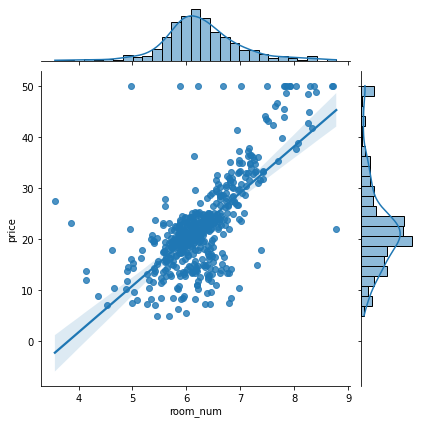

In [235]:
sns.jointplot(x = house['room_num'], y = house['price'], kind='reg')

In [236]:
X_multi = house.drop("price", axis=1)

In [237]:
y_multi = house['price']

In [238]:
X_multi_cons = sn.add_constant(X_multi)

In [239]:
X_multi_cons.head()

,const,crime_rate,resid_area,air_qual,room_num,age,dist1,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,rainfall,parks,Lake,Lake and River,River
0,1.0,0.00632,32.31,0.538,6.575,65.2,4.35,24.7,4.98,1,5.480,11.1920,23,0.049347,0,0,1
1,1.0,0.02731,37.07,0.469,6.421,78.9,4.99,22.2,9.14,0,7.332,12.1728,42,0.046146,1,0,0
2,1.0,0.02729,37.07,0.469,7.185,61.1,5.03,22.2,4.03,0,7.394,101.1200,38,0.045764,0,0,0
3,1.0,0.03237,32.18,0.458,6.998,45.8,6.21,21.3,2.94,1,9.268,11.2672,45,0.047151,1,0,0
4,1.0,0.06905,32.18,0.458,7.147,54.2,6.16,21.3,5.33,0,8.824,11.2896,55,0.039474,1,0,0


In [240]:
lm_multi = sn.OLS(y_multi, X_multi_cons.astype(float)).fit()

In [241]:
#is NAN error check

X_multi_cons.isna().sum()

const             0
crime_rate        0
resid_area        0
air_qual          0
room_num          0
age               0
dist1             0
teachers          0
poor_prop         0
airport           0
n_hos_beds        0
n_hot_rooms       0
rainfall          0
parks             0
Lake              0
Lake and River    0
River             0
dtype: int64

In [242]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     80.43
Date:                Thu, 11 Aug 2022   Prob (F-statistic):          1.38e-125
Time:                        22:04:20   Log-Likelihood:                -1513.1
No. Observations:                 506   AIC:                             3060.
Df Residuals:                     489   BIC:                             3132.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -6.6360      5.101     -1.301      0.194     -16.659       3.387
crime_rate        -0.0744      0.030     -2.489      0.013      -0.133      -0.016
resid_area        -0.0396      0.057     -0.697      0.486      -0.151       0.072
air_qual         -19.5386      5.630     -3.471      0.001     -30.600      -8.477
room_num           4.1503      0.419      9.913      0.000       3.328       4.973
age               -0.0081      0.013     -0.600      0.549      -0.035       0.018
dist1             -1.2435      0.187     -6.639      0.000      -1.611      -0.875
teachers           0.9588      0.118      8.125      0.000       0.727       1.191
poor_prop         -0.5464      0.052    -10.572      0.000      -0.648      -0.445
airport            1.0641      0.450      2.362      0.019       0.179       1.949
n_hos_beds         0.3545      0.152      2.336      0.020       0.056       0.653
n_hot_rooms        0.0319      0.042      0.762      0.446      -0.050       0.114
rainfall           0.0180      0.018      1.016      0.310      -0.017       0.053
parks             59.2938     51.219      1.158      0.248     -41.343     159.931
Lake               0.2515      0.638      0.394      0.694      -1.002       1.505
Lake and River    -0.7893      0.711     -1.111      0.267      -2.186       0.607
River             -0.2945      0.544     -0.541      0.588      -1.363       0.774
==============================================================================
Omnibus:                      196.829   Durbin-Watson:                   0.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.006
Skew:                           1.673   Prob(JB):                    3.40e-204
Kurtosis:                       8.766   Cond. No.                     2.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [243]:
#sklearn method

In [244]:
lm3 = LinearRegression()

In [245]:
lm3.fit(X_multi, y_multi)

LinearRegression()

In [247]:
print(lm3.intercept_, lm3.coef_)

-6.635968039593191 [-7.43712682e-02 -3.95870485e-02 -1.95386122e+01  4.15030113e+00
 -8.09931816e-03 -1.24347485e+00  9.58756899e-01 -5.46356741e-01
  1.06411283e+00  3.54513516e-01  3.19336362e-02  1.79938732e-02
  5.92937887e+01  2.51522767e-01 -7.89269198e-01 -2.94464276e-01]


In [248]:
from sklearn.model_selection import train_test_split

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size = 0.2, random_state = 0)

In [252]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 16) (102, 16) (404,) (102,)


In [253]:
lm_a = LinearRegression()

In [254]:
lm_a.fit(X_train, y_train)

LinearRegression()

In [255]:
y_test_a = lm_a.predict(X_test)

In [256]:
y_train_a = lm_a.predict(X_train)

In [257]:
from sklearn.metrics import r2_score

In [258]:
r2_score(y_test, y_test_a)

0.5529610469804545

In [259]:
r2_score(y_train, y_train_a)

0.7610182034991761